In [1]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Pre-processing

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.3,
                                   zoom_range = 0.3,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/output/train',
                                                 target_size = (128, 128),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 4800 images belonging to 3 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/output/test',
                                            target_size = (128, 128),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 1200 images belonging to 3 classes.


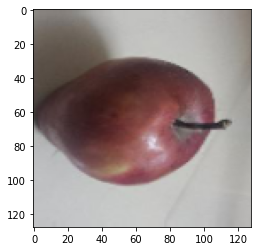

In [44]:
plt.imshow(training_set.next()[0][1])

# CNN Model

In [7]:
inputs = Input(shape = [128, 128, 3])

In [8]:
conv1 = Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[128, 128, 3])(inputs)

In [9]:
maxP1 = MaxPooling2D(pool_size=2, strides=2)(conv1)

In [10]:
conv2 = Conv2D(filters=32, kernel_size=3, activation='relu')(maxP1)

In [11]:
maxP2 = MaxPooling2D(pool_size=2, strides=2)(conv2)

In [12]:
flattern = Flatten()(maxP2)

In [13]:
dense1 = Dense(units=32, activation='relu')(flattern)

In [14]:
output = Dense(units=3, activation='softmax')(dense1)

In [15]:
model = Model(inputs=inputs, outputs=output)

In [ ]:
#Sequential
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[128, 128, 3]))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=32, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

In [16]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
model.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
75/75 [==============================] - 64s 845ms/step - loss: 0.9930 - accuracy: 0.4995 - val_loss: 0.8907 - val_accuracy: 0.6150
Epoch 2/10
75/75 [==============================] - 66s 876ms/step - loss: 0.5996 - accuracy: 0.7364 - val_loss: 0.3162 - val_accuracy: 0.8675
Epoch 3/10
75/75 [==============================] - 73s 976ms/step - loss: 0.3055 - accuracy: 0.8928 - val_loss: 0.3240 - val_accuracy: 0.8725
Epoch 4/10
75/75 [==============================] - 78s 1s/step - loss: 0.2235 - accuracy: 0.9157 - val_loss: 0.1475 - val_accuracy: 0.9492
Epoch 5/10
75/75 [==============================] - 83s 1s/step - loss: 0.2102 - accuracy: 0.9244 - val_loss: 0.1291 - val_accuracy: 0.9517
Epoch 6/10
75/75 [==============================] - 84s 1s/step - loss: 0.1314 - accuracy: 0.9534 - val_loss: 0.1252 - val_accuracy: 0.9542
Epoch 7/10
75/75 [==============================] - 84s 1s/step - loss: 0.1554 - accuracy: 0.9378 - val_loss: 0.1107 - val_accuracy: 0.9592
Epoch 8/10


In [34]:
import numpy as np
from keras.preprocessing import image
classes = training_set.class_indices
print(classes)
d = dict()
for i in classes.keys():
    d[classes[i]] = i
print(d)
def testModel(path):
    test_image = image.load_img(path, target_size = (128,128))
    plt.imshow(test_image)
    test_image_array = image.img_to_array(test_image)
    test_image_array = np.expand_dims(test_image_array, axis=0)
    result = model.predict(test_image_array)
    print(result[0])
    pr = np.argmax(result[0])
    prediction = d[pr]
    print(prediction)

{'Apple': 0, 'Banana': 1, 'Guava': 2}
{0: 'Apple', 1: 'Banana', 2: 'Guava'}


[1. 0. 0.]
Apple


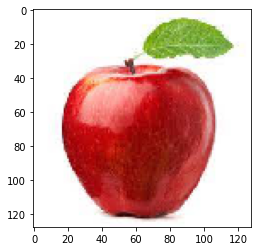

In [35]:
testModel('dataset/single_pred/apple_or_banana1.jfif')

[0. 1. 0.]
Banana


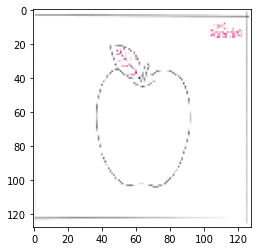

In [36]:
testModel('dataset/single_pred/apple_or_banana2.png')

[0. 0. 1.]
Guava


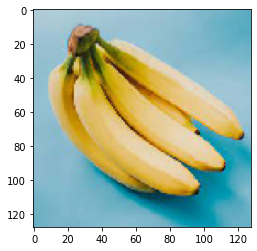

In [37]:
testModel('dataset/single_pred/apple_or_banana3.jfif')

[0. 1. 0.]
Banana


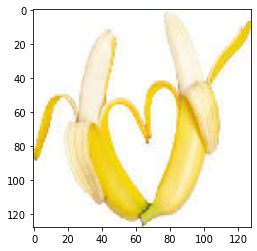

In [38]:
testModel('dataset/single_pred/apple_or_banana4.jfif')

[0. 1. 0.]
Banana


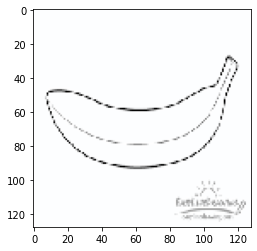

In [39]:
testModel('dataset/single_pred/apple_or_banana5.png')

[0. 1. 0.]
Banana


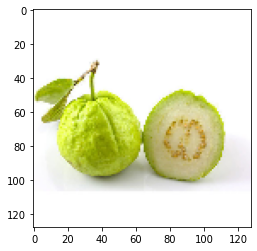

In [40]:
testModel('dataset/single_pred/apple_or_banana6.jpg')

[0. 1. 0.]
Banana


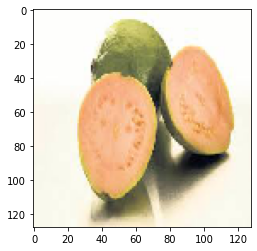

In [41]:
testModel('dataset/single_pred/apple_or_banana7.jfif')

[0. 1. 0.]
Banana


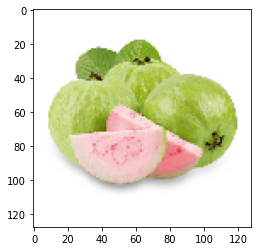

In [42]:
testModel('dataset/single_pred/apple_or_banana8.png')